# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment to train a mechanical arm to reach a given target location. This was part of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

## 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from collections import deque

import numpy as np
import matplotlib.pyplot as plt
import torch
from tqdm import tqdm
from unityagents import UnityEnvironment

from ddpg_agent import Agent

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='Reacher_Linux/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

## 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=False)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


## 3. Learning stage

### 3.1 TODO

TODO: describe algorithm

### 3.2 Put everything together

Now it's time to train our own agent to solve the environment!

In [5]:
random_seed = 1701
num_episodes = 1000
is_solved_score = 30
print_freq = 0.025

agent = Agent(state_size=state_size, action_size=action_size,
              random_seed=random_seed)
best_score = -1
scores_window = deque(maxlen=100)
scores_all = []
if print_freq < 1:
    print_freq = max(int(print_freq * num_episodes), 1)

for i_episode in tqdm(range(1, num_episodes + 1)):
    env_info = env.reset(train_mode=True)[brain_name]
    states = env_info.vector_observations
    scores = np.zeros(num_agents)
    
    while True:
        actions = agent.act(states)
        
        env_info = env.step(actions)[brain_name]
        next_states = env_info.vector_observations
        rewards = env_info.rewards
        dones = env_info.local_done
        agent.step(states, actions, rewards, next_states, dones)
        
        scores += env_info.rewards
        states = next_states
        if any(dones):
            break
    
    avg_score = scores.mean()
    scores_all.append(avg_score)
    scores_window.append(avg_score)
    
    if i_episode % print_freq == 0:
        print(f'Total score (averaged over agents) '
              f'this episode: {avg_score:.4f}')
    
    if avg_score > best_score:
        agent.save()
        best_score = avg_score
    
    if np.mean(scores_window) >= is_solved_score:
        print(f'Challenge solved after {i_episode:.4f} episodes')
        agent.save()
        break

  0%|          | 1/1000 [00:22<6:13:12, 22.42s/it]

Hitjackpot at episode: 1
Best score so far is: 0.2345


  0%|          | 2/1000 [00:45<6:16:12, 22.62s/it]

Hitjackpot at episode: 2
Best score so far is: 1.3695


  1%|          | 10/1000 [03:42<6:02:17, 21.96s/it]

Hitjackpot at episode: 10
Best score so far is: 1.4670


  1%|▏         | 13/1000 [04:46<5:57:25, 21.73s/it]

Hitjackpot at episode: 13
Best score so far is: 1.6925


  1%|▏         | 14/1000 [05:08<5:56:08, 21.67s/it]

Hitjackpot at episode: 14
Best score so far is: 1.8815


  2%|▏         | 15/1000 [05:29<5:53:19, 21.52s/it]

Hitjackpot at episode: 15
Best score so far is: 2.1300


  2%|▏         | 18/1000 [06:35<5:56:41, 21.79s/it]

Hitjackpot at episode: 18
Best score so far is: 2.7860


  2%|▏         | 19/1000 [06:57<5:56:15, 21.79s/it]

Hitjackpot at episode: 19
Best score so far is: 3.0050


  2%|▏         | 20/1000 [07:18<5:54:50, 21.72s/it]

Hitjackpot at episode: 20
Best score so far is: 3.1285


  2%|▏         | 21/1000 [07:40<5:53:24, 21.66s/it]

Hitjackpot at episode: 21
Best score so far is: 3.1560


  2%|▏         | 22/1000 [08:01<5:50:32, 21.51s/it]

Hitjackpot at episode: 22
Best score so far is: 3.5855


  2%|▎         | 25/1000 [09:06<5:52:22, 21.68s/it]

Total score (averaged over agents) this episode: 4.4575
Hitjackpot at episode: 25
Best score so far is: 4.4575


  3%|▎         | 27/1000 [09:47<5:45:19, 21.29s/it]

Hitjackpot at episode: 27
Best score so far is: 5.9705


  3%|▎         | 28/1000 [10:09<5:47:12, 21.43s/it]

Hitjackpot at episode: 28
Best score so far is: 6.6705


  3%|▎         | 29/1000 [10:30<5:45:31, 21.35s/it]

Hitjackpot at episode: 29
Best score so far is: 7.2365


  3%|▎         | 31/1000 [11:13<5:45:44, 21.41s/it]

Hitjackpot at episode: 31
Best score so far is: 7.5080


  3%|▎         | 33/1000 [11:56<5:45:05, 21.41s/it]

Hitjackpot at episode: 33
Best score so far is: 8.5300


  3%|▎         | 34/1000 [12:18<5:45:28, 21.46s/it]

Hitjackpot at episode: 34
Best score so far is: 9.3680


  4%|▎         | 35/1000 [12:40<5:46:53, 21.57s/it]

Hitjackpot at episode: 35
Best score so far is: 9.6670


  4%|▎         | 36/1000 [13:01<5:46:02, 21.54s/it]

Hitjackpot at episode: 36
Best score so far is: 10.5635


  4%|▍         | 43/1000 [15:33<5:46:49, 21.75s/it]

Hitjackpot at episode: 43
Best score so far is: 11.4860


  5%|▍         | 47/1000 [17:00<5:43:17, 21.61s/it]

Hitjackpot at episode: 47
Best score so far is: 15.3080


  5%|▌         | 50/1000 [18:05<5:42:16, 21.62s/it]

Total score (averaged over agents) this episode: 13.4995


  5%|▌         | 53/1000 [19:10<5:41:58, 21.67s/it]

Hitjackpot at episode: 53
Best score so far is: 16.0515


  6%|▌         | 57/1000 [20:34<5:30:42, 21.04s/it]

Hitjackpot at episode: 57
Best score so far is: 16.3715


  6%|▌         | 58/1000 [20:56<5:33:41, 21.25s/it]

Hitjackpot at episode: 58
Best score so far is: 16.9460


  6%|▌         | 59/1000 [21:18<5:35:13, 21.37s/it]

Hitjackpot at episode: 59
Best score so far is: 19.5120


  6%|▌         | 60/1000 [21:40<5:37:19, 21.53s/it]

Hitjackpot at episode: 60
Best score so far is: 20.8215


  6%|▌         | 62/1000 [22:23<5:38:23, 21.65s/it]

Hitjackpot at episode: 62
Best score so far is: 22.3880


  8%|▊         | 75/1000 [27:05<5:33:11, 21.61s/it]

Total score (averaged over agents) this episode: 21.4985


  8%|▊         | 76/1000 [27:28<5:35:22, 21.78s/it]

Hitjackpot at episode: 76
Best score so far is: 23.1905


  8%|▊         | 78/1000 [28:10<5:28:16, 21.36s/it]

Hitjackpot at episode: 78
Best score so far is: 24.5710


  8%|▊         | 79/1000 [28:32<5:29:53, 21.49s/it]

Hitjackpot at episode: 79
Best score so far is: 27.8695


  9%|▊         | 86/1000 [31:04<5:29:52, 21.65s/it]

Hitjackpot at episode: 86
Best score so far is: 30.6015


  9%|▉         | 89/1000 [32:09<5:28:30, 21.64s/it]

Hitjackpot at episode: 89
Best score so far is: 31.3260


 10%|▉         | 95/1000 [34:19<5:28:26, 21.77s/it]

Hitjackpot at episode: 95
Best score so far is: 33.1400


 10%|▉         | 99/1000 [35:43<5:14:14, 20.93s/it]

Hitjackpot at episode: 99
Best score so far is: 33.6500


 10%|█         | 100/1000 [36:05<5:17:54, 21.19s/it]

Total score (averaged over agents) this episode: 34.1285
Hitjackpot at episode: 100
Best score so far is: 34.1285


 11%|█         | 112/1000 [40:25<5:21:10, 21.70s/it]

Hitjackpot at episode: 112
Best score so far is: 34.7615


 11%|█▏        | 113/1000 [40:46<5:16:37, 21.42s/it]

Hitjackpot at episode: 113
Best score so far is: 36.8270


 12%|█▎        | 125/1000 [45:05<5:14:41, 21.58s/it]

Total score (averaged over agents) this episode: 29.9595


 15%|█▌        | 150/1000 [54:08<5:07:01, 21.67s/it]

Total score (averaged over agents) this episode: 33.9490


 16%|█▋        | 163/1000 [58:52<5:03:58, 21.79s/it]

Challenge solved after 164.0000 episodes


Let's visualize the progression of our agent along the course of all the episodes

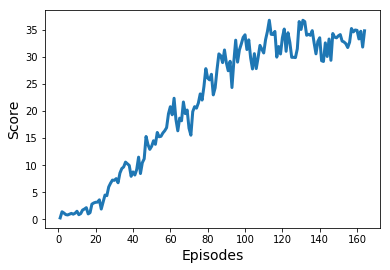

In [6]:
plt.plot(range(1, len(scores_all) + 1), scores_all,
         lw=3)
plt.xlabel('Episodes', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.xticks(fontsize=11)
plt.xticks(fontsize=11)
np.save('scores', scores_all)

## 4. Watch a smart agent

TODO

In [7]:
random_seed = 1701
agent = Agent(state_size=state_size, action_size=action_size,
              random_seed=random_seed)
agent.load('checkpoint.pth', map_location='cpu')

env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = agent.act(states)
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents): {}'.format(np.mean(scores)))

Total score (averaged over agents): 35.93649919675663
